## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則化來觀察訓練情形。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [4]:
# 讀取糖尿病資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


(102,)
(102,)


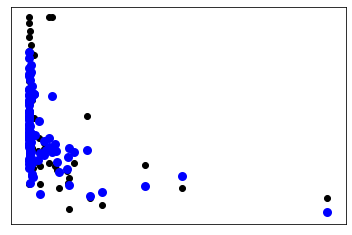

In [18]:
print(x_test[:,2].shape)
print(y_test.shape)

import matplotlib.pyplot as plt

plt.scatter(x_test[:,0], y_test,  color='black')
plt.scatter(x_test[:,0], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [19]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 25.42


In [37]:

# 建立一個線性回歸模型
lasso = linear_model.Lasso(alpha=0.2)

# 將訓練資料丟進去模型訓練
lasso.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = lasso.predict(x_test)

In [38]:
# 印出各特徵對應的係數，可以看到許多係數都變成 0，Lasso Regression 的確可以做特徵選取
lasso.coef_

array([-0.10352965,  0.04890495, -0.02915034,  0.        , -0.        ,
        3.56522839, -0.01576328, -1.17371101,  0.26651933, -0.01574119,
       -0.75574867,  0.00957983, -0.52465625])

In [39]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 26.60


In [40]:
# 建立一個線性回歸模型
ridge = linear_model.Ridge(alpha=0.2)

# 將訓練資料丟進去模型訓練
ridge.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

# 印出 Ridge 的參數，可以很明顯看到比起 Linear Regression，參數的數值都明顯小了許多
print(ridge.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

[-1.14877966e-01  4.73654143e-02 -1.77329833e-03  3.16231468e+00
 -1.44208162e+01  3.90191854e+00 -1.29375833e-02 -1.50807271e+00
  2.87496280e-01 -1.35481844e-02 -8.82811277e-01  8.91589549e-03
 -4.60110652e-01]
Mean squared error: 25.42


In [41]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(ridge, x_test, y_pred, cv=3))
print(cross_val_score(lasso, x_test, y_pred, cv=3))
print(cross_val_score(regr, x_test, y_pred, cv=3))

[0.98402619 0.9931526  0.99661945]
[0.95893323 0.96791738 0.96475732]
[1. 1. 1.]


In [42]:
coef_dict = {}

for coef, feat in zip(lasso.coef_,boston_data.feature_names):

    coef_dict[feat] = coef
    
print(coef_dict)

{'CRIM': -0.10352964557876174, 'ZN': 0.048904952469494986, 'INDUS': -0.029150338200803413, 'CHAS': 0.0, 'NOX': -0.0, 'RM': 3.565228392786228, 'AGE': -0.0157632795302998, 'DIS': -1.173711010664743, 'RAD': 0.266519331333875, 'TAX': -0.01574119412229439, 'PTRATIO': -0.7557486679700454, 'B': 0.009579834789633243, 'LSTAT': -0.524656246788621}


In [47]:
# 讀取糖尿病資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

df_wine = pd.DataFrame(wine.data,columns=wine.feature_names)
df_wine['target'] = pd.Series(wine.target)
print(df_wine.head())

#預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [48]:

# 建立一個線性回歸模型
lasso = linear_model.Lasso(alpha=0.2)

# 將訓練資料丟進去模型訓練
lasso.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = lasso.predict(x_test)

# 印出各特徵對應的係數，可以看到許多係數都變成 0，Lasso Regression 的確可以做特徵選取
print(lasso.coef_)

coef_dict = {}

for coef, feat in zip(lasso.coef_,wine.feature_names):

    coef_dict[feat] = coef
    
print(coef_dict)


#預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

[-0.          0.         -0.          0.02547336  0.         -0.
 -0.15617061  0.         -0.          0.09481945 -0.         -0.
 -0.00145954]
Mean squared error: 0.16
{'alcohol': -0.0, 'malic_acid': 0.0, 'ash': -0.0, 'alcalinity_of_ash': 0.025473355441263206, 'magnesium': 0.0, 'total_phenols': -0.0, 'flavanoids': -0.15617060609776498, 'nonflavanoid_phenols': 0.0, 'proanthocyanins': -0.0, 'color_intensity': 0.09481945087637267, 'hue': -0.0, 'od280/od315_of_diluted_wines': -0.0, 'proline': -0.0014595356467222793}
Mean squared error: 0.16


In [51]:

# 建立一個線性回歸模型
ridge = linear_model.Ridge(alpha=0.5)

# 將訓練資料丟進去模型訓練
ridge.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = ridge.predict(x_test)

# 印出各特徵對應的係數，可以看到許多係數都變成 0，Lasso Regression 的確可以做特徵選取
print(ridge.coef_)


coef_dict = {}

for coef, feat in zip(ridge.coef_,wine.feature_names):

    coef_dict[feat] = coef
    
print(coef_dict)


#預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

[-0.1073333   0.01712214 -0.21119203  0.04590509  0.00039135  0.11063007
 -0.31826171 -0.13486439  0.03590049  0.07673492 -0.14525493 -0.27955302
 -0.00076108]
{'alcohol': -0.10733329569286422, 'malic_acid': 0.017122142368239484, 'ash': -0.21119202973007103, 'alcalinity_of_ash': 0.04590509233622534, 'magnesium': 0.0003913504818575969, 'total_phenols': 0.11063007349945994, 'flavanoids': -0.3182617108882503, 'nonflavanoid_phenols': -0.13486438507560838, 'proanthocyanins': 0.035900492079075, 'color_intensity': 0.07673492165609759, 'hue': -0.14525493320372143, 'od280/od315_of_diluted_wines': -0.2795530199106988, 'proline': -0.0007610751427079415}
Mean squared error: 0.07
